In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = [224, 224]

In [4]:
train_directory=r"../input/animal-birds/animal_birds/train"
test_directory=r"../input/animal-birds/animal_birds/test"

In [5]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 2s 0us/step


In [6]:
  # useful for getting number of classes
ff=r"../input/animal-birds/animal_birds/train/*"
folders = glob(ff)
len(folders)

614

In [7]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 90035 images belonging to 614 classes.
Found 3075 images belonging to 614 classes.


In [11]:
print(len(training_set))
print(len(test_set))

2814
97


In [12]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/tmp/ipykernel_47/4039646700.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
2814/2814 [==============================] - 1654s 584ms/step - loss: 7.0001 - accuracy: 0.3034 - val_loss: 4.3601 - val_accuracy: 0.5369
Epoch 2/20
2814/2814 [==============================] - 1276s 453ms/step - loss: 4.5341 - accuracy: 0.5360 - val_loss: 3.9584 - val_accuracy: 0.6182
Epoch 3/20
2814/2814 [==============================] - 1291s 459ms/step - loss: 3.7306 - accuracy: 0.6233 - val_loss: 3.5007 - val_accuracy: 0.6657
Epoch 4/20
2814/2814 [==============================] - 1304s 463ms/step - loss: 3.2278 - accuracy: 0.6776 - val_loss: 3.4090 - val_accuracy: 0.7024
Epoch 5/20
2814/2814 [==============================] - 1321s 470ms/step - loss: 2.8023 - accuracy: 0.7201 - val_loss: 2.9888 - val_accuracy: 0.7369
Epoch 6/20
2814/2814 [==============================] - 1379s 490ms/step - loss: 2.5105 - accuracy: 0.7525 - val_loss: 3.5534 - val_accuracy: 0.7262
Epoch 7/20
2814/2814 [==============================] - 1362s 484ms/step - loss: 2.2724 - accuracy: 0.7757

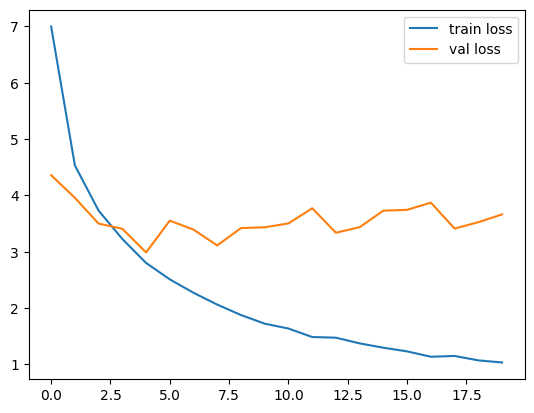

In [13]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

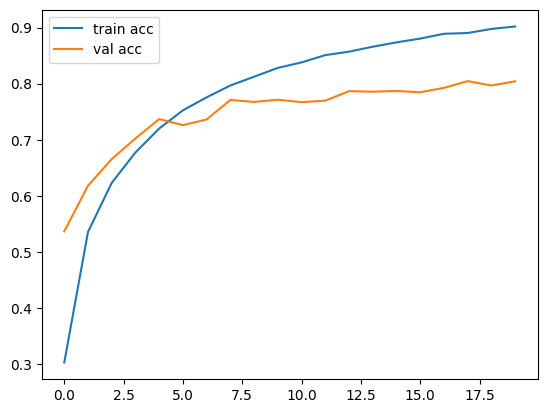

In [14]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [16]:
model.save('animal_birds.h5')

In [17]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array

model1 = load_model('./animal_birds.h5',compile=False)  

In [18]:
lab = training_set.class_indices
lab={k:v for v,k in lab.items()}
print(lab)

{0: 'ABBOTTS BABBLER', 1: 'ABBOTTS BOOBY', 2: 'ABYSSINIAN GROUND HORNBILL', 3: 'AFRICAN CROWNED CRANE', 4: 'AFRICAN EMERALD CUCKOO', 5: 'AFRICAN FIREFINCH', 6: 'AFRICAN OYSTER CATCHER', 7: 'AFRICAN PIED HORNBILL', 8: 'AFRICAN PYGMY GOOSE', 9: 'ALBATROSS', 10: 'ALBERTS TOWHEE', 11: 'ALEXANDRINE PARAKEET', 12: 'ALPINE CHOUGH', 13: 'ALTAMIRA YELLOWTHROAT', 14: 'AMERICAN AVOCET', 15: 'AMERICAN BITTERN', 16: 'AMERICAN COOT', 17: 'AMERICAN DIPPER', 18: 'AMERICAN FLAMINGO', 19: 'AMERICAN GOLDFINCH', 20: 'AMERICAN KESTREL', 21: 'AMERICAN PIPIT', 22: 'AMERICAN REDSTART', 23: 'AMERICAN ROBIN', 24: 'AMERICAN WIGEON', 25: 'AMETHYST WOODSTAR', 26: 'ANDEAN GOOSE', 27: 'ANDEAN LAPWING', 28: 'ANDEAN SISKIN', 29: 'ANHINGA', 30: 'ANIANIAU', 31: 'ANNAS HUMMINGBIRD', 32: 'ANTBIRD', 33: 'ANTELOPE', 34: 'ANTILLEAN EUPHONIA', 35: 'APAPANE', 36: 'APOSTLEBIRD', 37: 'ARARIPE MANAKIN', 38: 'ASHY STORM PETREL', 39: 'ASHY THRUSHBIRD', 40: 'ASIAN CRESTED IBIS', 41: 'ASIAN DOLLARD BIRD', 42: 'ASIAN GREEN BEE EATER',

In [19]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = lab[y]
    return res

1/1 [==============================] - 0s 21ms/step


'AMERICAN WIGEON'

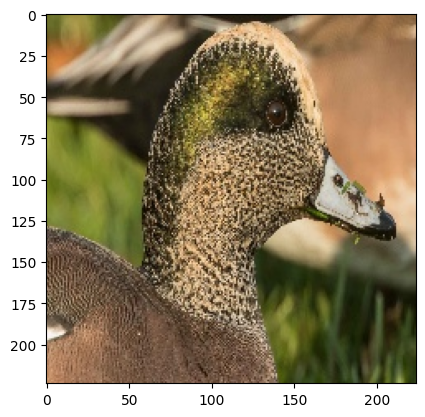

In [21]:
img='../input/animal-birds/animal_birds/train/AMERICAN WIGEON/002.jpg'
pic=load_img(img,target_size=(224,224,3))
plt.imshow(pic)
output(img)